In [11]:
# 导入sklearn中datasets模块
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

# 新增导入一下模块
import matplotlib.colors
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [12]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

#### 一、创建模拟数据集

In [13]:
# 改变随机种子数，可以改变创建的数据集
np.random.seed(121)
# make_moones 创建的数据集默认有2列，即2个特征,分为2类
X,y = datasets.make_moons(n_samples=200,
                          shuffle=True,
                          noise=0.1,
                          random_state=None)

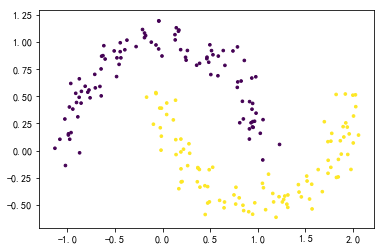

In [14]:
# 数据集的第一个特征作为x轴，第二特征作为y轴
plt.scatter(X[:,0],   # 第一特征作为x轴
            X[:,1],   # 第二特征作为y轴
            c=y,      # 样本类别作为点颜色
            s=7)      # 点的大小

#### 二、使用Kmeans算法对以上样本点进行聚类分析

In [15]:
km = DBSCAN(eps=0.2,min_samples=2)
km.fit(X)


# 尝试用基于划分的KMeans算法进行聚类
# km = KMeans(n_clusters=2,  # 将所有的样本聚为4个类
#             random_state=28)
# km.fit(X)

DBSCAN(eps=0.2, min_samples=2)

#### 三、使用聚类模型对样本进行预测

In [16]:
y_hat = km.fit_predict(X) # 模型预测的类别 

In [17]:
print("真实类别标签：",y[:10])
print("预测类别标签：",y_hat[:10])

真实类别标签： [0 1 0 0 1 1 1 0 1 1]
预测类别标签： [0 1 0 0 1 1 1 0 1 1]


#### 五、可视化

In [18]:
# 扩展坐标轴的边界值
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

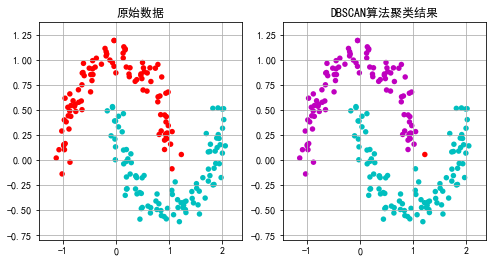

In [20]:
## 五、画图
# 根据给定颜色字母，创建样色容器
cm = mpl.colors.ListedColormap(list('rgbmyc'))

plt.figure(figsize=(8,4), facecolor='w')

# 绘制原始样本点
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
# 找出第一个特征和第二特征的最小值
x1_min, x2_min = np.min(X, axis=0)
# 找出第一个特征和第二特征的最大值
x1_max, x2_max = np.max(X, axis=0)

# 根据特征最大值和最小值的差值，扩展边界值
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
# 根据扩展后的结果将x,y轴进行拉伸
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'原始数据')
plt.grid(True)
# 绘制聚类的效果图
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'DBSCAN算法聚类结果')
# plt.title(u'KMeans算法聚类结果')
plt.grid(True)
plt.show()